# Used Car Sales EDA and Data Cleaning

## Exploratory Data Analysis (EDA)

In [313]:
##Load in data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('vehicles.csv')

In [314]:
##Explore numerical features
cars.describe(include=[np.number])

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [315]:
##Explore categrocial features
cars.describe(include=[object])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,458213,458213,458213,439993,453367,265273,287073,454976,455636,455771,270664,324025,136865,345475,317370,458185,458143,458213,458185
unique,458213,405,413,43,31520,6,8,5,6,3,133620,3,4,13,12,285404,384347,51,423805
top,https://syracuse.craigslist.org/ctd/d/weedspor...,columbus,https://bend.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1C4HJWDG6HL702229,4wd,full-size,sedan,white,https://images.craigslist.org/00c0c_1gCUGosl6w...,"👉 BAD Credit, NO Credit - OKAY! We FINANCE ANY...",ca,2020-11-22T06:14:19-0500
freq,1,3818,2989,79666,8370,115685,105677,399399,439626,396322,194,139693,69736,92364,82786,194,247,51856,7


Text(0, 0.5, 'Frequency')

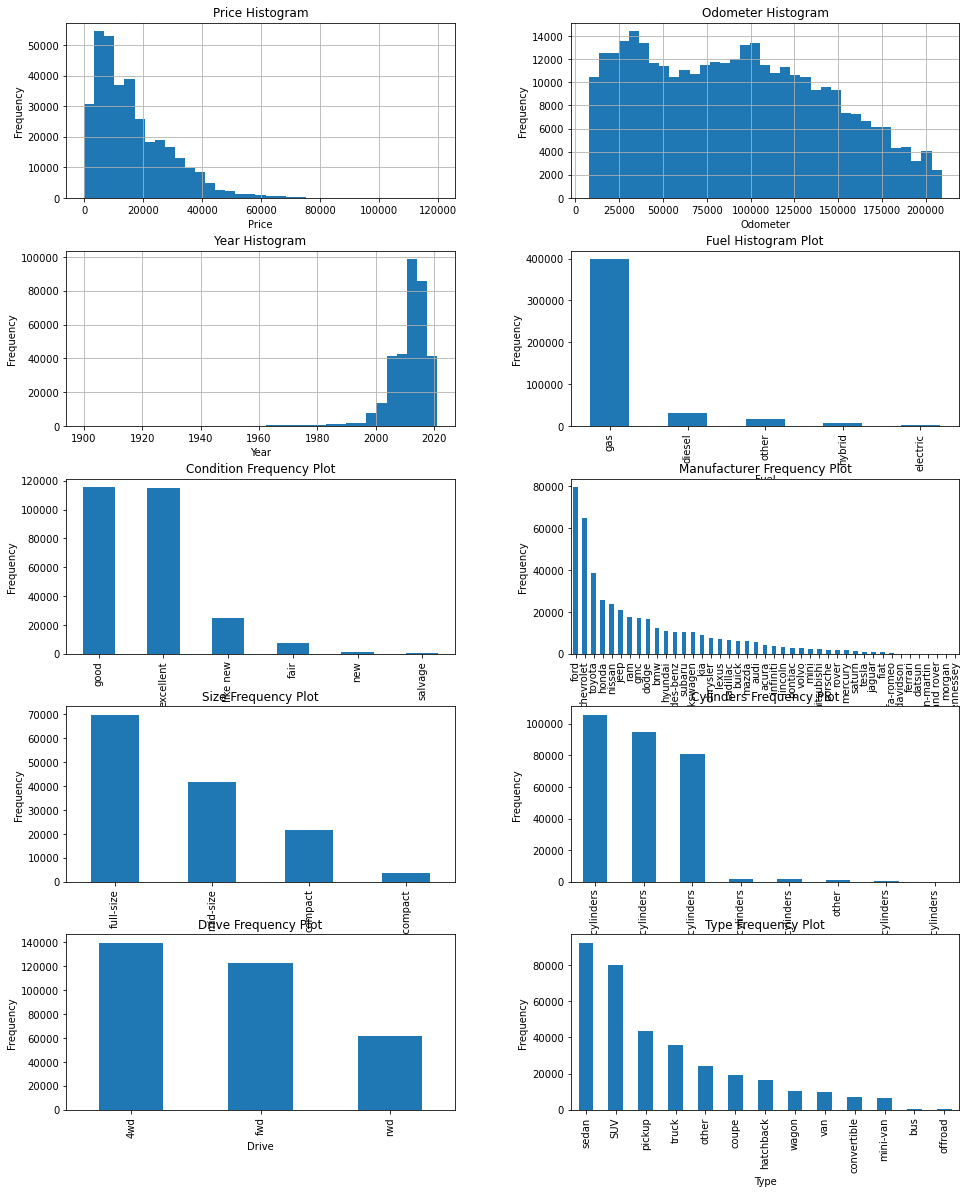

In [320]:
##Visualise the distribtions of important features (removing outliers to see true distributions)

##filter out outliers of price and odometer
price_hi = cars['price'].quantile(0.999)
price_lo = cars['price'].quantile(0.001)

odom_hi = cars_filtered['odometer'].quantile(0.999)
odom_lo = cars_filtered['odometer'].quantile(0.001)

cars_filtered = cars[(cars['price'] < price_hi) & (cars['price'] > price_lo) & (cars['odometer'] < odom_hi) & (cars['odometer'] > odom_lo)]

##Plot distributions
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,20))

cars_filtered.hist(column='price', bins=35, ax=ax[0][0])
cars_filtered.hist(column='odometer', bins=35, ax=ax[0][1])


cars_filtered.hist(column='year', bins=35, ax=ax[1][0])
cars['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

cars['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
cars['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

cars['size'].value_counts().plot(kind='bar', ax=ax[3][0])
cars['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

cars['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
cars['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")


Text(0.5, 1.0, 'Odometer vs Price')

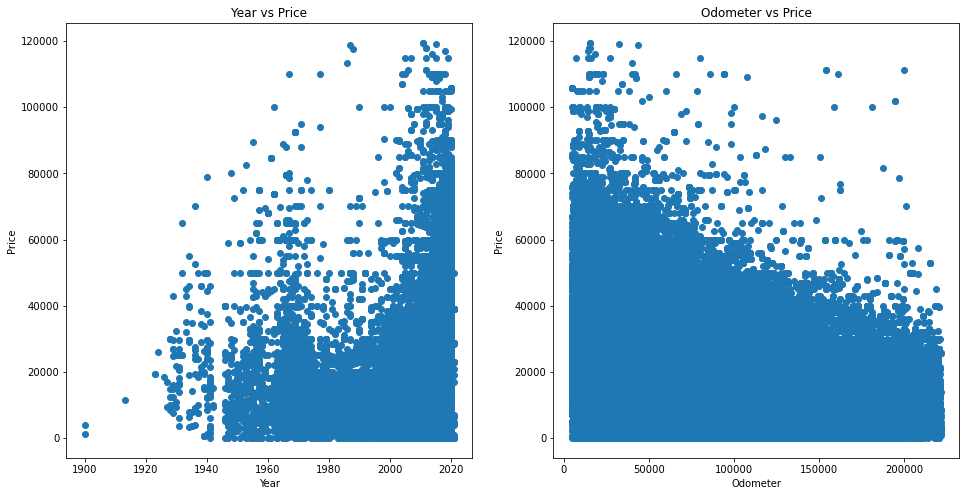

In [268]:
## Visualise some correlations between attributes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

##Price vs year
cars_filtered.plot(x='year', y='price', style='o', ax=ax[0])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")
ax[0].get_legend().remove()
ax[0].set_title("Year vs Price")

##Price vs odometer
cars_filtered.plot(x='odometer', y='price', style='o', ax=ax[1])
ax[1].set_xlabel("Odometer")
ax[1].set_ylabel("Price")
ax[1].get_legend().remove()
ax[1].set_title("Odometer vs Price")

## Data Cleaning

Rows :  340801
Features : 16


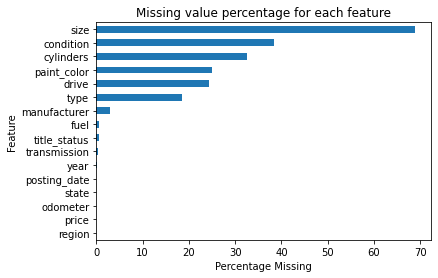

In [346]:
#Firstly ensure we are working with the dataset with removed outliers
cars = cars_filtered

#Remove obviously redundant features
cars = cars.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'VIN', 'description', 'lat', 'long', 'model'], axis=1)

def displayStats(df):
    print("Rows : ", len(df))
    print("Features :", len(df.columns))
    
    missing = df.isnull().sum()/len(df)*100
    missing = missing.sort_values()
    ax = missing.plot.barh(x='Percentage Missing', y='Feature')

    ax.set_title("Missing value percentage for each feature")
    ax.set_xlabel("Percentage Missing")
    ax.set_ylabel("Feature")
    
displayStats(cars)


Rows :  76763
Features : 16


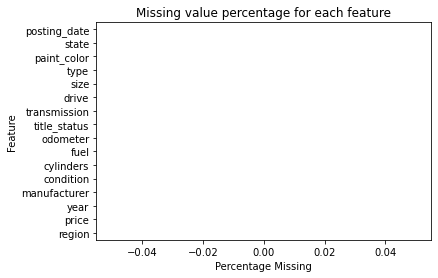

In [347]:
#Dropping all rows with missing values
cars_dropped = cars.dropna()

displayStats(cars_dropped)

Rows :  340801
Features : 16
Rows :  326658
Features : 16


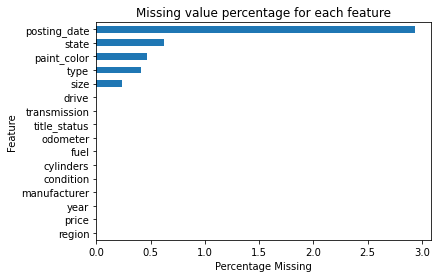

In [348]:
#Clearly dropping all rows with missing data is not suitable, therefore we can fill in useful data

def fillCondition(row):
    if pd.isnull(row['condition']):
        year = row['year']
        if year>2019:
            return 'new'
        elif year>2017:
            return 'like new'
        elif year>2015:
            return 'excellent'
        elif year>2013:
            return 'good'
        else:
            return 'fair'
    else:
        return row['condition']


#condition - fill by year of car
cars['condition'] = cars.apply(fillCondition, axis=1)    


#Fill the rest through pandas fillna method
cars[['size', 'cylinders', 'paint_color', 'drive', 'type']] = cars[['size', 'cylinders', 'paint_color', 'drive', 'type']].fillna(method='ffill')

displayStats(cars)

cars_cleaned = cars.dropna()
displayStats(cars_cleaned)

Text(0, 0.5, 'Frequency')

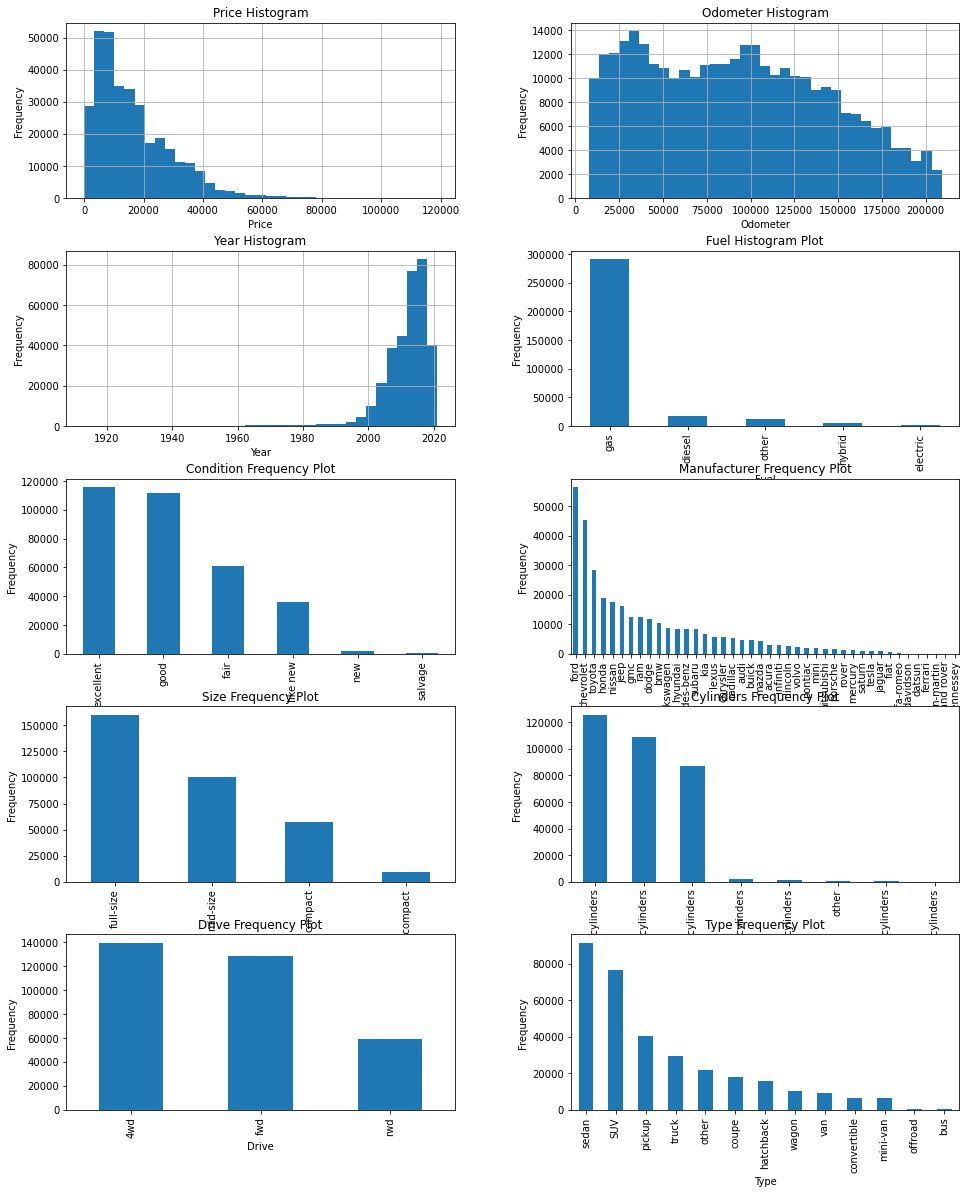

In [349]:
##Plot distributions of cleaned data

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,20))

cars_cleaned.hist(column='price', bins=35, ax=ax[0][0])
cars_cleaned.hist(column='odometer', bins=35, ax=ax[0][1])


cars_cleaned.hist(column='year', bins=35, ax=ax[1][0])
cars_cleaned['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

cars_cleaned['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
cars_cleaned['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

cars_cleaned['size'].value_counts().plot(kind='bar', ax=ax[3][0])
cars_cleaned['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

cars_cleaned['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
cars_cleaned['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")


In [355]:
##Encoding of categorical data

#Everything one hot encoded apart from cylinders, condition, size and posting date
encoded_cars = pd.get_dummies(cars_cleaned, columns=['region','manufacturer','fuel','title_status','transmission','drive','type','paint_color','state'])


##Ordinal encoding or cylinders, condition, size and posting date

encoded_cars.describe()


,price,year,odometer,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
count,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,...,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000,326658.000000
mean,16330.545779,2011.559591,91868.959603,0.007411,0.000245,0.006499,0.006169,0.006637,0.000419,0.001424,...,0.004335,0.025256,0.050273,0.003144,0.022874,0.007035,0.029496,0.032040,0.002354,0.002660
std,12638.477377,6.926083,51952.308306,0.085770,0.015648,0.080355,0.078298,0.081197,0.020475,0.037703,...,0.065697,0.156901,0.218508,0.055983,0.149502,0.083579,0.169192,0.176106,0.048462,0.051509
min,1.000000,1913.000000,7575.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6850.000000,2008.000000,46077.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12995.000000,2013.000000,89998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22995.000000,2016.000000,131500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118800.000000,2021.000000,208994.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
